## Fetch the Data and Visualize Data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


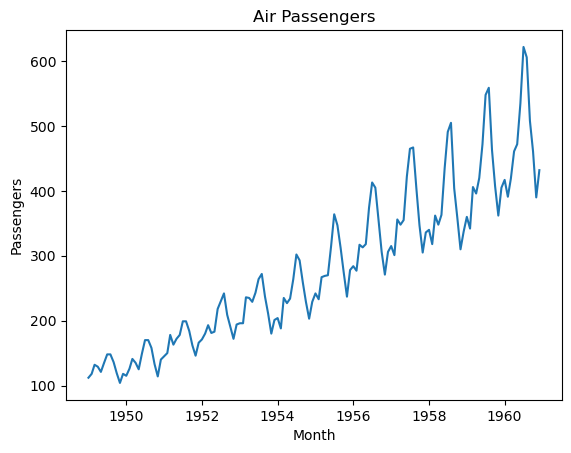

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('data-sets/air_passengers.csv')

# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as the index
df.set_index('Month', inplace=True)

df['Passengers'] = df
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Air Passengers')
plt.show()

## Determine p,d,q,s parameters and clear trend and seasonality

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# d = # of differencing

# First, test for stationarity

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# This part is wrong we should take 2nd order differencing or more.
# Change the if loop
# If p-value > 0.05, the series is non-stationary, we need to take differences
if result[1] > 0.05:
    df['diff_1'] = df['Passengers'].diff()
    result = adfuller(df['diff_1'].dropna())
    print('ADF Statistic after 1st diff: %f' % result[0])
    print('p-value after 1st diff: %f' % result[1])
    d = 1
else:
    d = 0

# s = seasonality component
s = 12
df 
# Then, decompose the series to find the seasonal component
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive', period=s)

train_size = int(len(df) * 0.8)
test_size = int(len(df) * 0.2)

df['trend'] = decomposition.trend

df['seasonal'] = decomposition.seasonal

df['normalized_residual'] = decomposition.resid
df.dropna(inplace=True)  # Drop rows with NaN values
# Detrend and deseasonalize by dividing by the trend and seasonal components
df['detrended'] = df['Passengers'] / df['trend']
df['deseasonalized'] = df['detrended'] / df['seasonal']


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:

# Normalized residual
#df['normalized_residual']=(df['residual'] - df['residual'].min()) / (df['residual'].max() - df['residual'].min())
#plt.plot(df['normalized_residual'])


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# p = AR component
p = 3

for i in range(1, p+1):
    df[f'lag_{i}'] = df['normalized_residual'].shift(i)


# q = MA component
q = 3

df['rolling_mean'] = df['normalized_residual'].rolling(window=q).mean()

df.dropna(inplace=True)  # Drop rows with NaN values

df

,Passengers,diff_1,trend,seasonal,normalized_residual,detrended,deseasonalized,lag_1,lag_2,lag_3,rolling_mean
Month,,,,,,,,,,,
1949-10-01,119,-17.0,128.583333,-20.642677,11.059343,0.925470,-0.044833,-8.478535,-42.073232,-42.622475,-13.164141
1949-11-01,104,-15.0,129.000000,-53.593434,28.593434,0.806202,-0.015043,11.059343,-8.478535,-42.073232,10.391414
1949-12-01,118,14.0,129.750000,-28.619949,16.869949,0.909441,-0.031776,28.593434,11.059343,-8.478535,18.840909
1950-01-01,115,-3.0,131.250000,-24.748737,8.498737,0.876190,-0.035403,16.869949,28.593434,11.059343,17.987374
1950-02-01,126,11.0,133.083333,-36.188131,29.104798,0.946775,-0.026163,8.498737,16.869949,28.593434,18.157828
...,...,...,...,...,...,...,...,...,...,...,...
1960-02-01,391,-26.0,461.375000,-36.188131,-34.186869,0.847467,-0.023418,-14.584596,-17.005051,-30.239899,-21.925505
1960-03-01,419,28.0,465.208333,-2.241162,-43.967172,0.900672,-0.401877,-34.186869,-14.584596,-17.005051,-30.912879
1960-04-01,461,42.0,469.333333,-8.036616,-0.296717,0.982244,-0.122221,-43.967172,-34.186869,-14.584596,-26.150253


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # for example

# Select features and target
X = df[['lag_1', 'lag_2', 'lag_3', 'rolling_mean']]
y = df['normalized_residual']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## Bayesian Oprimization for Hyperparameter Tuning

In [6]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_histogram
import skopt
import numpy as np
from sklearn.svm import SVR

# Decleartions for deprecated functions in numpy
np.float = float    
np.int = int    
np.object = object    
np.bool = bool    

# Define hyperparameters for bayesian optimization
param_space = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'C': (1e-6, 1e+1, 'log-uniform'),
    'gamma': (1e-6, 1e+1, 'log-uniform'),
    'epsilon': (1e-6, 1e+6, 'log-uniform')
    }


kFold = KFold(n_splits=3, shuffle=True, random_state=10)

model = SVR()

bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, cv= kFold, n_jobs=-1, 
                             scoring='neg_mean_absolute_percentage_error', n_iter=5)

bayes_search.fit(X_train, y_train)

# Print the cross validation results
cv_results = bayes_search.cv_results_
cv_results_df = pd.DataFrame(cv_results)

cv_results_df['kernel'] = cv_results_df['params'].apply(lambda x: x['kernel'])
cv_results_df['C'] = cv_results_df['params'].apply(lambda x: x['C'])
cv_results_df['gamma'] = cv_results_df['params'].apply(lambda x: x['gamma'])
cv_results_df['epsilon'] = cv_results_df['params'].apply(lambda x: x['epsilon'])


print(cv_results_df[['mean_test_score', 'kernel', 'C', 'gamma', 'epsilon']])

# plot_objective creates pairwise dependence plot of the objective function.
# plot_objective(bayes_search.optimizer_results_[0],
#                    dimensions=["C", "gamma", "epsilon"],
#                    n_minimum_search=int(1e8))

# Print the best hyperparameters
print('Best hyperparameters:', bayes_search.best_params_)

best_model = bayes_search.best_estimator_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


26


,normalized_residual
Month,
1958-05-01,-13.202020
1958-06-01,18.638889
1958-07-01,45.335859
1958-08-01,58.510101
1958-09-01,0.979798
1958-10-01,-10.690657
1958-11-01,-31.114899
1958-12-01,-33.005051
1959-01-01,-17.792929


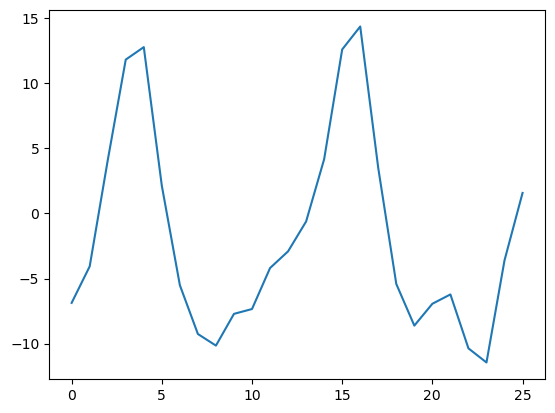

In [7]:

best_model.fit(X_train, y_train)

# Predict residuals
residuals_predicted = best_model.predict(X_test)
plt.plot(residuals_predicted)
print(len(residuals_predicted))
test_df = pd.DataFrame(y_test)
test_df

In [8]:
df['trend_train'] = df['trend'][:train_size]
df['trend_test'] = df['trend'][train_size:]
df['seasonal_train'] = df['seasonal'][:train_size]
df['seasonal_test'] = df['seasonal'][train_size:]
print(df['seasonal'][train_size:].shape)
print(df['seasonal_test'].shape)

(14,)
(129,)


(26,)
(129,)
(129,)
DatetimeIndex(['1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01'],
              dtype='datetime64[ns]', name='Month', freq=None)


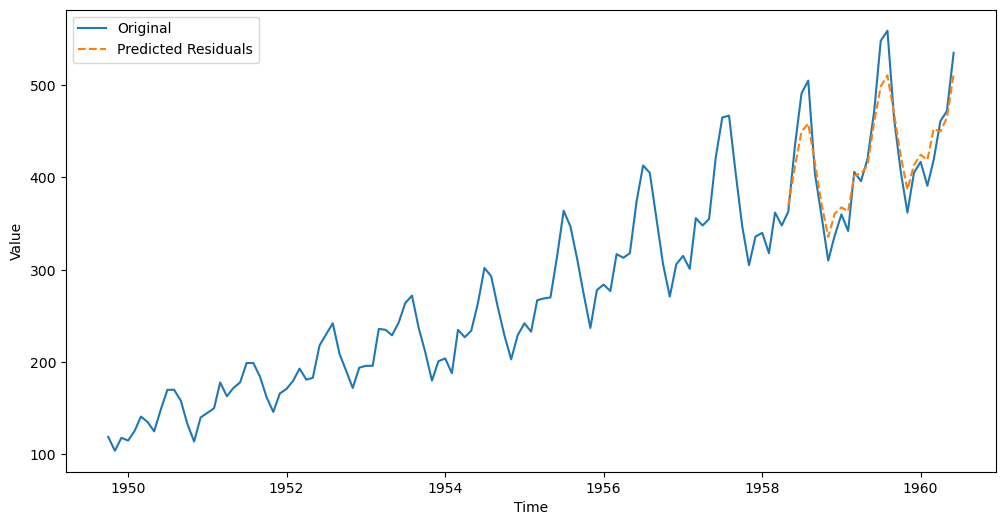

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the predicted residuals
residuals_predicted_df = pd.DataFrame(residuals_predicted, index=X_test.index, columns=['predicted_residuals'])

# Denormalize data
#residuals_predicted_df = (residuals_predicted_df - residuals_predicted_df.min()) / (residuals_predicted_df.max() - residuals_predicted_df.min())

print(residuals_predicted_df['predicted_residuals'].shape)
print(df['seasonal_test'].shape)
print(df['trend_test'].shape)
# Add trend and seasonality back to the perdicted residual
residuals_predicted_df['reconstructed'] = df['trend'] + df['seasonal'] + residuals_predicted_df['predicted_residuals']


# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot the latter part of the original time series
ax.plot(df.loc[df.index, 'Passengers'], label='Original')

# Plot the predicted residuals
ax.plot(residuals_predicted_df['reconstructed'], label='Predicted Residuals', linestyle='--')

print(residuals_predicted_df['reconstructed'].index)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Assuming 'Passengers' is your original data and 'reconstructed' is your predicted data
mse = mean_squared_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
rmse = math.sqrt(mse)
nrmse = rmse / (df.loc[X_test.index, 'Passengers'].max() - df.loc[X_test.index, 'Passengers'].min())
r2e = r2_score(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
mape = mean_absolute_percentage_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Normalized Root Mean Squared Error:", nrmse)
print("R Squared Error: ", r2e)
print("MAPE", mape)

Mean Squared Error:  584.021030891785
Root Mean Squared Error:  24.166527075518836
Normalized Root Mean Squared Error: 0.09705432560449331
R Squared Error:  0.8633184556290697
MAPE 0.045782658890488485
